# Hate Speech Analysis

imports

In [5]:
import sys
assert sys.version_info >= (3, 5) # python>=3.5
import sklearn
assert sklearn.__version__ >= "0.20" # sklearn >= 0.20

import numpy as np #numerical package in python
import os
%matplotlib inline
import matplotlib.pyplot as plt #plotting package

# to make this notebook's output identical at every run
np.random.seed(42)

#matplotlib magic for inline figures
%matplotlib inline 
import matplotlib # plotting library
import matplotlib.pyplot as plt

# Where to save the figures
ROOT_DIR = "."

import os
import tarfile
import urllib

import pandas as pd

data = pd.read_csv("../hate-speech-dataset.csv")


In [6]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
data.drop("id", axis=1)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [8]:
data['no_symbols'] = data['comment_text'].str.replace("[^a-zA-Z#]", " ")


In [9]:
data["remove_short"] = data['no_symbols'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [10]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,no_symbols,remove_short
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...,Explanation Why the edits made under username ...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches this background colour I m s...,aww matches this background colour seemingly s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I m really not trying to edit war It...,Hey man really not trying edit war just that t...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can t make any real suggestions on im...,More can make any real suggestions improvement...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember...,You sir are hero Any chance you remember what ...


In [11]:
data["remove_long"] = data['remove_short'].apply(lambda x: ' '.join([w for w in x.split() if len(w)<500]))
tokens = data['remove_long'].apply(lambda x: x.split())


In [8]:
from nltk import PorterStemmer

ps=PorterStemmer()

tokens = tokens.apply(lambda x: [ps.stem(i) for i in x])

In [9]:
for i in range(len(tokens)):
    tokens[i]=' '.join(tokens[i])
data['tidied_text']=tokens
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,no_symbols,remove_short,remove_long,tidied_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...,Explanation Why the edits made under username ...,Explanation Why the edits made under username ...,explan whi the edit made under usernam hardcor...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches this background colour I m s...,aww matches this background colour seemingly s...,aww matches this background colour seemingly s...,aww match thi background colour seemingli stuc...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I m really not trying to edit war It...,Hey man really not trying edit war just that t...,Hey man really not trying edit war just that t...,hey man realli not tri edit war just that thi ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can t make any real suggestions on im...,More can make any real suggestions improvement...,More can make any real suggestions improvement...,more can make ani real suggest improv wonder t...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember...,You sir are hero Any chance you remember what ...,You sir are hero Any chance you remember what ...,you sir are hero ani chanc you rememb what pag...


In [10]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [11]:
all_words_positive = ' '.join(text for text in data['tidied_text'][data['identity_hate']==1])


In [12]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

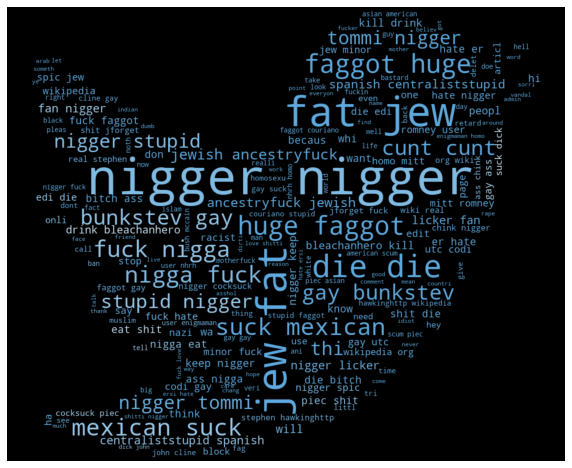

In [13]:

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [47]:
all_words_positive = ' '.join(text for text in data['tidied_text'][data['identity_hate']==0])


In [15]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

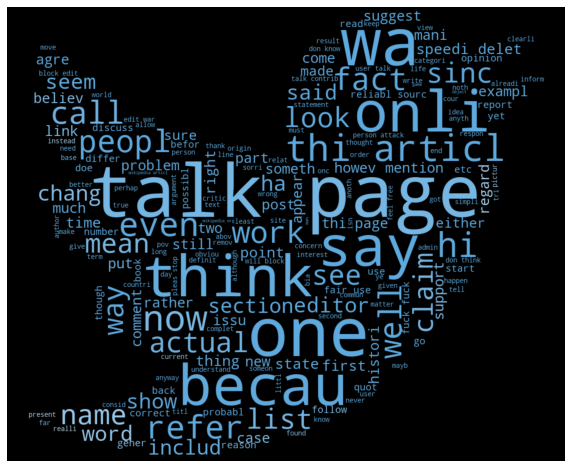

In [16]:

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [31]:
all_words_insult = ' '.join(text for text in data['tidied_text'][data['insult']==1])
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_insult)

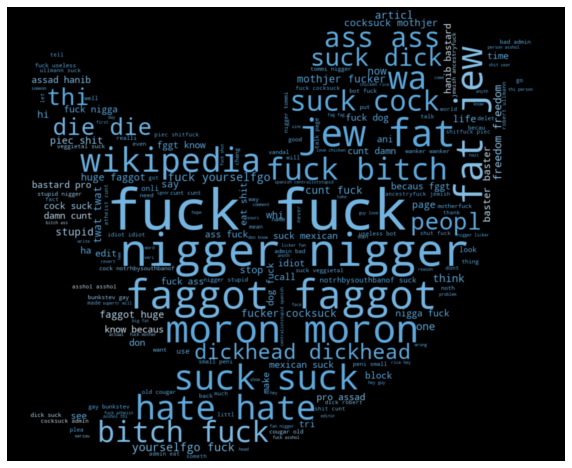

In [32]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()


In [34]:
data["insult"].value_counts()

0    151694
1      7877
Name: insult, dtype: int64

In [35]:
all_words_insult

'cocksuck befor you piss around work you are gay antisemmitian archangel white tiger meow greetingshhh there are two way whi you eras comment about that holocaust wa brutal slay jew and not gay gypsi slav anyon you are anti semitian than shave your head bald and the skinhead meet you doubt word the bibl that homosexu deadli sin make pentagram tatoo your forehead the satanist mass with your gay pal first and last warn you fuck gay won appreci ani more nazi shwain would write page don wish talk you anymor bewar the dark side fuck your filthi mother the ass dri stupid peac shit stop delet stuff asshol die and fall hole hell toni sidaway obvious fistfucke love arm hi ass all edit are good cunt like you who revert good edit becaus you too stupid understand how write well and then revert other edit just becaus you decid bear playground grudg are the problem mayb one day you realis the damag you did nobl project would you both shut you don run wikipedia especi stupid kid pair jew hate weiner 

In [36]:
# from sklearn.feature_extraction.text import CountVectorizer

# bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# # bag-of-words feature matrix
# bow = bow_vectorizer.fit_transform(data['tidied_text'])

# df_bow = pd.DataFrame(bow.todense())


In [12]:
data["sentiment"]=data["toxic"]+data["severe_toxic"]+data["threat"]+data["insult"]+data["identity_hate"]

In [13]:

data["sentiment"].value_counts()

0    143663
1      7987
2      5560
3      1933
4       397
5        31
Name: sentiment, dtype: int64

In [28]:
#only a few 5's so we change them to 4
data.loc[data["sentiment"]==5, "sentiment"] = 4
data.loc[data["sentiment"]>0, "bad"] = 1
data.loc[data["sentiment"]==0, "bad"] = 0


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,no_symbols,remove_short,remove_long,sentiment,bad
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...,Explanation Why the edits made under username ...,Explanation Why the edits made under username ...,0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches this background colour I m s...,aww matches this background colour seemingly s...,aww matches this background colour seemingly s...,0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I m really not trying to edit war It...,Hey man really not trying edit war just that t...,Hey man really not trying edit war just that t...,0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can t make any real suggestions on im...,More can make any real suggestions improvement...,More can make any real suggestions improvement...,0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember...,You sir are hero Any chance you remember what ...,You sir are hero Any chance you remember what ...,0,0.0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,Congratulations from me as well use the to...,Congratulations from well use the tools well talk,Congratulations from well use the tools well talk,0,0.0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,COCKSUCKER BEFORE YOU PISS AROUND WORK,COCKSUCKER BEFORE YOU PISS AROUND WORK,3,1.0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,Your vandalism to the Matt Shirvington article...,Your vandalism the Matt Shirvington article ha...,Your vandalism the Matt Shirvington article ha...,0,0.0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,Sorry if the word nonsense was offensive to ...,Sorry the word nonsense was offensive you Anyw...,Sorry the word nonsense was offensive you Anyw...,0,0.0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,alignment on this subject and which are contra...,alignment this subject and which are contrary ...,alignment this subject and which are contrary ...,0,0.0


In [15]:
gData = data[['remove_long', 'sentiment']].copy()

In [16]:
gData.head()

,remove_long,sentiment
0,Explanation Why the edits made under username ...,0
1,aww matches this background colour seemingly s...,0
2,Hey man really not trying edit war just that t...,0
3,More can make any real suggestions improvement...,0
4,You sir are hero Any chance you remember what ...,0


In [17]:
gData.to_csv("gData.csv", encoding='utf-8', index=False)

In [18]:
gData.drop_duplicates(subset ="remove_long", 
                     keep = False, inplace = True)

In [19]:
gData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157417 entries, 0 to 159570
Data columns (total 2 columns):
remove_long    157417 non-null object
sentiment      157417 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [48]:
gData.to_csv("gData2.csv", encoding='utf-8', index=False)

In [20]:
gData= gData.iloc[:99900]

In [21]:
gData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99900 entries, 0 to 101265
Data columns (total 2 columns):
remove_long    99900 non-null object
sentiment      99900 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [57]:
gData.drop(0,axis=0)

,remove_long,sentiment
1,aww matches this background colour seemingly s...,0
2,Hey man really not trying edit war just that t...,0
3,More can make any real suggestions improvement...,0
4,You sir are hero Any chance you remember what ...,0
5,Congratulations from well use the tools well talk,0
...,...,...
101261,agree with some the finer detail merged with t...,0
101262,Dont tell chill Ill chill you you acctully rea...,0
101263,Thanks Arabic language option but not content ...,0
101264,Repeated vandalism under different identities ...,0


In [24]:
gData.to_csv("gData7.csv", encoding='utf-8',header=False, index=False)

In [29]:
gData.head()

,remove_long,sentiment
0,Explanation Why the edits made under username ...,0
1,aww matches this background colour seemingly s...,0
2,Hey man really not trying edit war just that t...,0
3,More can make any real suggestions improvement...,0
4,You sir are hero Any chance you remember what ...,0


In [26]:
# import numpy as np
# import csv
# import sys
# vec_file = list(csv.reader(open("../crawl-300d-2M.vec"), delimiter=" "))

Error: field larger than field limit (131072)

In [33]:
gData.loc[data["sentiment"]>0, "bad"] = 1
gData.loc[data["sentiment"]==0, "bad"] = 0
gData2 = gData



,remove_long,sentiment,bad
0,Explanation Why the edits made under username ...,0,0.0
1,aww matches this background colour seemingly s...,0,0.0
2,Hey man really not trying edit war just that t...,0,0.0
3,More can make any real suggestions improvement...,0,0.0
4,You sir are hero Any chance you remember what ...,0,0.0


In [36]:
gData2.drop("sentiment", axis=1)


,remove_long,bad
0,Explanation Why the edits made under username ...,0.0
1,aww matches this background colour seemingly s...,0.0
2,Hey man really not trying edit war just that t...,0.0
3,More can make any real suggestions improvement...,0.0
4,You sir are hero Any chance you remember what ...,0.0
...,...,...
101261,agree with some the finer detail merged with t...,0.0
101262,Dont tell chill Ill chill you you acctully rea...,0.0
101263,Thanks Arabic language option but not content ...,0.0
101264,Repeated vandalism under different identities ...,0.0


In [37]:
gData2.to_csv("gDataBinary.csv", encoding='utf-8',header=False, index=False)

In [38]:
gData2.drop_duplicates(subset ="remove_long", 
                     keep = False, inplace = True)

In [44]:
gData2["bad"].value_counts()

0.0    89937
1.0     9963
Name: bad, dtype: int64

In [45]:
gData2

99900